# EDA

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data = pd.read_csv('datasets/abalone/abalone.data', names=columns)

In [59]:
# print some info
print(data.info())

# no missing value
# Since all fields except sex is numeric, we're not going to do some intensive job on data preprocessing part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [60]:
# all unique values of sex field
print(data['Sex'].unique())

['M' 'F' 'I']


In [61]:
# convert objects into integers
sex_map = {'M': 0, 'F': 1, 'I': 2}

data['Sex'] = data['Sex'].map(sex_map)

# see the new sex values
print(data.head())

   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [62]:
# explore dataset
print(data.head())

   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [63]:
# get statistical summary
print(data.describe())

               Sex       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      0.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%       0.000000     0.450000     0.350000     0.115000      0.441500   
50%       1.000000     0.545000     0.425000     0.140000      0.799500   
75%       2.000000     0.615000     0.480000     0.165000      1.153000   
max       2.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

In [64]:
# validation of no missing values
print(data.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


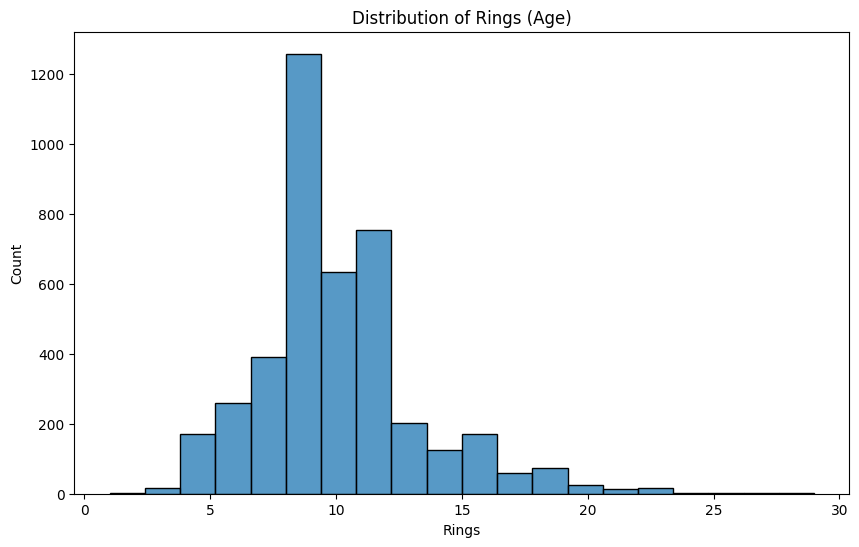

In [65]:
# visualizing dataset
plt.figure(figsize=(10, 6))
sns.histplot(data['Rings'], bins=20, kde=False)
plt.title('Distribution of Rings (Age)')
plt.show()

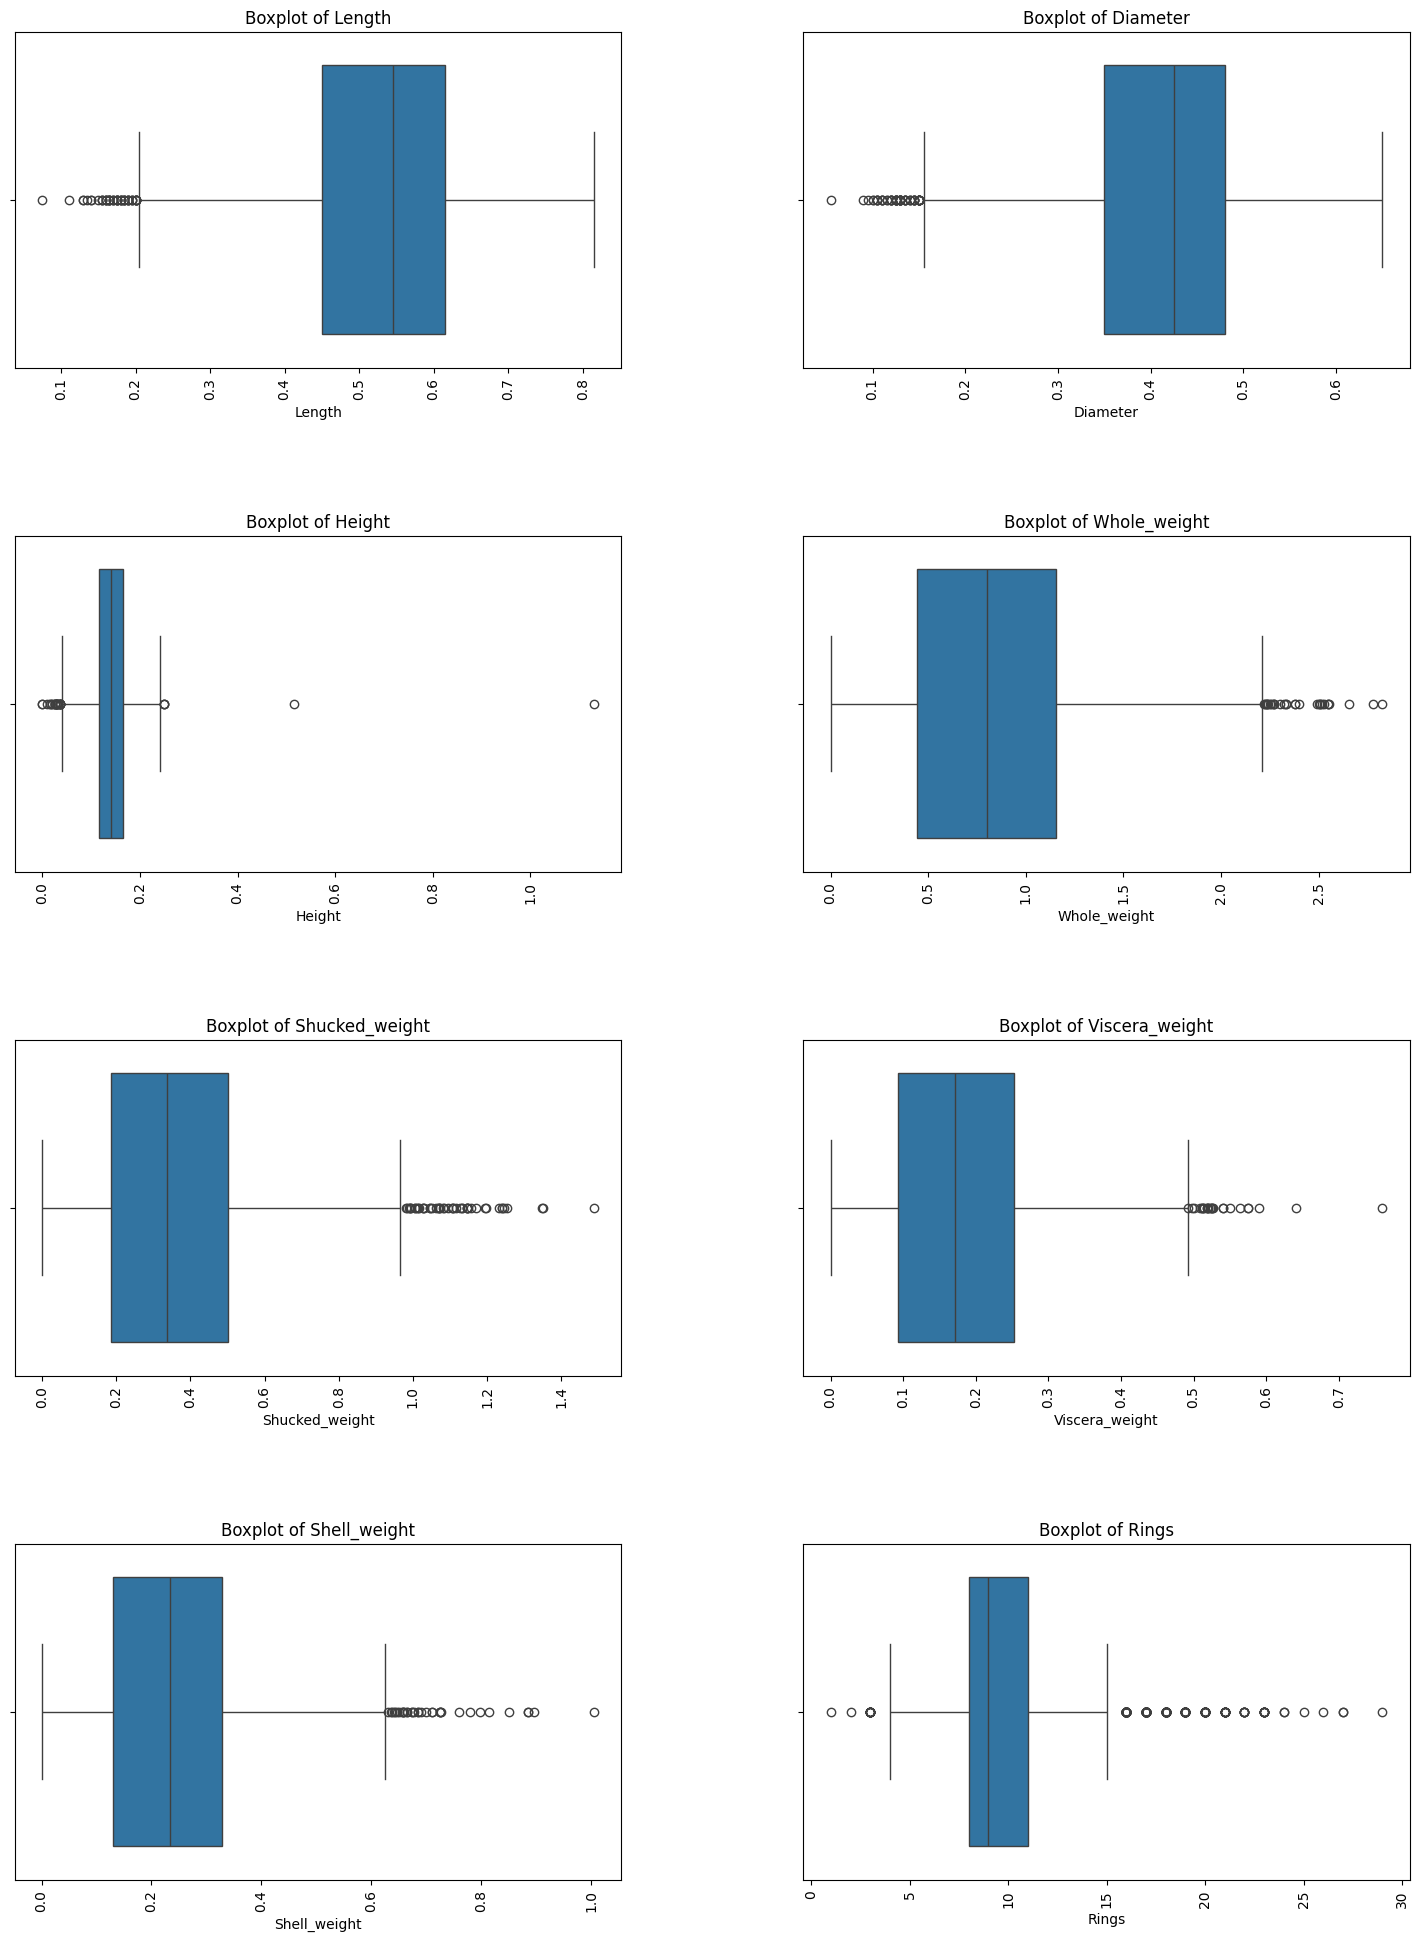

In [66]:
# print potential outliers

rows = 4
cols = 2

# create a figure with the desired size
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
axes = axes.flatten()  # Flatten the axes array to make it 1D

# iterate over the numerical variables and plot each boxplot in a separate subplot
for i, col in enumerate(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']):
    ax = axes[i]
    sns.boxplot(data=data, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# remove any unused subplots
for ax in axes[num_vars:]:
    ax.set_visible(False)

# display the figure
plt.show()

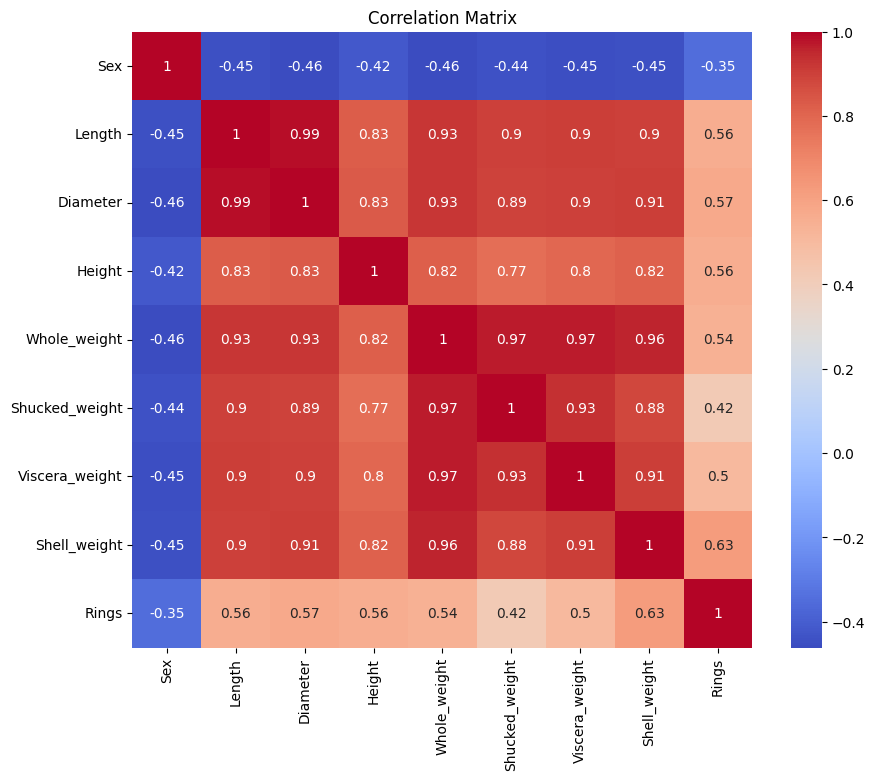

In [67]:
# correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()